In [1]:
# project: p7
# submitter: rjfischer
# partner: none

# P7: Hospital Readmission 

In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Part 1: Train/Test Split

In [3]:
from zipfile import ZipFile

with ZipFile("dataset_diabetes.zip") as zf:
    with zf.open("dataset_diabetes/diabetic_data.csv") as f:
        data = pd.read_csv(f)

#data=pd.read_csv("diabetic_data.csv")

split=[]
for i in range(len(data)):
    total=0
    for l in str(data.iloc[i,0]):
        total+=int(l)
    for s in str(data.iloc[i,1]):
        total+=int(s)
    if total%2==0:
        split.append(True)
    elif total%2==1:
        split.append(False)

data["split"]=split        

train=data[data["split"]==True]
test=data[data["split"]==False]    
train=train.drop(columns=["split"])
test=test.drop(columns=["split"])

In [4]:
#q1
train.shape, test.shape

((50803, 50), (50963, 50))

In [5]:
#q2
(
    train["time_in_hospital"].mean(),
    test["time_in_hospital"].mean(),
    train["time_in_hospital"].std(), 
    test["time_in_hospital"].std(),
)

(4.401295199102416, 4.390695210250574, 2.984025665505041, 2.9862059667206435)

In [6]:
#q3
{
    "train": dict(train["readmitted"].value_counts()),
    "test": dict(test["readmitted"].value_counts()),
}

{'train': {'NO': 27360, '>30': 17770, '<30': 5673},
 'test': {'NO': 27504, '>30': 17775, '<30': 5684}}

In [114]:
#q4
l=len(train)
train=train.replace('?', np.nan)
missing=train.isna().sum()
d=missing/l*100
train=train.replace(np.nan, "?")
{x:y for x,y in d.items() if y!=0}

{'race': 2.2104993799578763,
 'weight': 96.80924354860933,
 'payer_code': 39.25949254965258,
 'medical_specialty': 49.180166525598885,
 'diag_1': 0.023620652323681674,
 'diag_2': 0.3444678463870244,
 'diag_3': 1.3955868747908586}

In [8]:
#q5
l=[]
keys=train.dtypes.keys()
for i in range(len(train.dtypes)):
    if train.dtypes[i]=="int64":
        l.append(keys[i])
sorted(l)

['admission_source_id',
 'admission_type_id',
 'discharge_disposition_id',
 'encounter_id',
 'num_lab_procedures',
 'num_medications',
 'num_procedures',
 'number_diagnoses',
 'number_emergency',
 'number_inpatient',
 'number_outpatient',
 'patient_nbr',
 'time_in_hospital']

# Part 2: Heat Maps

In [9]:
source_ids = set(train["admission_source_id"])
discharge_ids = set(train["discharge_disposition_id"])
source_ids

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 17, 20, 22, 25}

In [118]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
d = {}
for i in range(len(train)):
    adm_id = train.iloc[i]["admission_source_id"]
    dis_id = train.iloc[i]["discharge_disposition_id"]
    if dis_id not in d:
        d[dis_id] = {}
    if adm_id not in d[dis_id]:
        d[dis_id][adm_id] = 0   
    d[dis_id][adm_id] += 1
pairings = pd.DataFrame(d).fillna(0)


In [119]:
#q6
pairings

,25,1,6,5,2,11,3,7,10,4,18,8,14,13,12,17,16,22,23,9,20,15,28,24,19,27
1,133.0,9356,2029.0,145.0,204.0,117.0,1526.0,45.0,1.0,79.0,473.0,19.0,32.0,48.0,1.0,0.0,0.0,367.0,76.0,4.0,1.0,21.0,27.0,2.0,0.0,0.0
7,154.0,17042,3402.0,311.0,685.0,566.0,4128.0,235.0,1.0,250.0,970.0,22.0,100.0,144.0,0.0,0.0,0.0,558.0,101.0,7.0,0.0,6.0,34.0,16.0,4.0,1.0
4,5.0,843,258.0,28.0,49.0,23.0,87.0,3.0,0.0,11.0,229.0,5.0,2.0,4.0,0.0,0.0,0.0,21.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,20,25.0,7.0,4.0,20.0,277.0,0.0,0.0,5.0,58.0,0.0,2.0,3.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,198.0,1616,620.0,68.0,72.0,66.0,700.0,12.0,0.0,4.0,2.0,9.0,31.0,4.0,0.0,9.0,7.0,21.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,319,87.0,9.0,3.0,11.0,30.0,1.0,0.0,8.0,52.0,6.0,0.0,1.0,0.0,0.0,0.0,13.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
20,0.0,55,11.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,730,23.0,44.0,17.0,8.0,189.0,6.0,0.0,64.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,27,21.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
from io import TextIOWrapper

with ZipFile("dataset_diabetes.zip") as zf:
    with zf.open("dataset_diabetes/IDs_mapping.csv") as f:
        id_mappings = TextIOWrapper(f).read()

parts = id_mappings.split("\n,\n")
for p in parts:
    name = p[:p.index(",")] + ".csv"
    print(name)
    # TODO: write the string p to a file named name.
    with open(name, "w") as f:
        f.write(p)
        
df1 = pd.read_csv("admission_type_id.csv")
df2 = pd.read_csv("discharge_disposition_id.csv")
df3 = pd.read_csv("admission_source_id.csv")

src_descr = dict(df3.set_index("admission_source_id")["description"])
dis_descr = dict(df2.set_index("discharge_disposition_id")["description"])

admission_type_id.csv
discharge_disposition_id.csv
admission_source_id.csv


In [89]:
#q7
descr_pairs = pairings.copy()
descr_pairs = descr_pairs.rename(columns=dis_descr, index=src_descr)
descr_pairs

,Not Mapped,Discharged to home,Discharged/transferred to home with home health service,Discharged/transferred to another type of inpatient care institution,Discharged/transferred to another short term hospital,Expired,Discharged/transferred to SNF,Left AMA,Neonate discharged to another hospital for neonatal aftercare,Discharged/transferred to ICF,NaN,Discharged/transferred to home under care of Home IV provider,Hospice / medical facility,Hospice / home,Still patient or expected to return for outpatient services,Discharged/transferred/referred to this institution for outpatient services,Discharged/transferred/referred another institution for outpatient services,Discharged/transferred to another rehab fac including rehab units of a hospital .,Discharged/transferred to a long term care hospital.,Admitted as an inpatient to this hospital,"Expired in a medical facility. Medicaid only, hospice.",Discharged/transferred within this institution to Medicare approved swing bed,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,"Expired at home. Medicaid only, hospice.",Discharged/transferred to a federal health care facility.
Physician Referral,133.0,9356,2029.0,145.0,204.0,117.0,1526.0,45.0,1.0,79.0,473.0,19.0,32.0,48.0,1.0,0.0,0.0,367.0,76.0,4.0,1.0,21.0,27.0,2.0,0.0,0.0
Emergency Room,154.0,17042,3402.0,311.0,685.0,566.0,4128.0,235.0,1.0,250.0,970.0,22.0,100.0,144.0,0.0,0.0,0.0,558.0,101.0,7.0,0.0,6.0,34.0,16.0,4.0,1.0
Transfer from a hospital,5.0,843,258.0,28.0,49.0,23.0,87.0,3.0,0.0,11.0,229.0,5.0,2.0,4.0,0.0,0.0,0.0,21.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Transfer from a Skilled Nursing Facility (SNF),1.0,20,25.0,7.0,4.0,20.0,277.0,0.0,0.0,5.0,58.0,0.0,2.0,3.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NaN,198.0,1616,620.0,68.0,72.0,66.0,700.0,12.0,0.0,4.0,2.0,9.0,31.0,4.0,0.0,9.0,7.0,21.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Clinic Referral,0.0,319,87.0,9.0,3.0,11.0,30.0,1.0,0.0,8.0,52.0,6.0,0.0,1.0,0.0,0.0,0.0,13.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
Not Mapped,0.0,55,11.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transfer from another health care facility,0.0,730,23.0,44.0,17.0,8.0,189.0,6.0,0.0,64.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HMO Referral,0.0,27,21.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Court/Law Enforcement,0.0,5,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


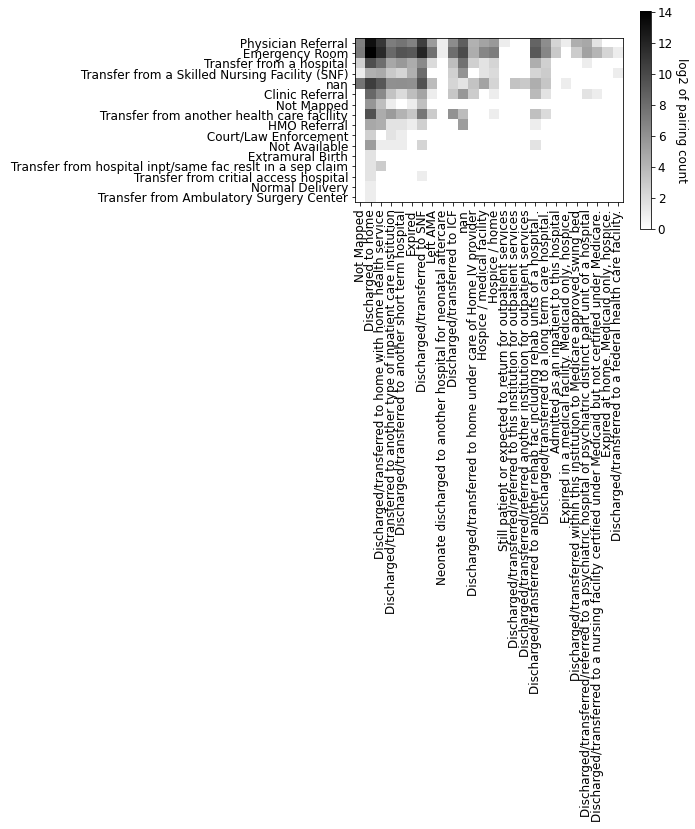

In [90]:
#q8
import matplotlib.pyplot as plt
heat_df = descr_pairs
heat_df[list(heat_df.columns)] += 1
heat_df = np.log2(heat_df)
plt.imshow(heat_df, cmap="binary")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('log2 of pairing count', rotation=270)
plt.xticks(range(len(heat_df.columns)), heat_df.columns, rotation=90)
plt.yticks(range(len(heat_df)), heat_df.index)
plt.show()

# Part 3: Regressions

In [51]:
train['visits'] = train['number_outpatient'] + train['number_inpatient'] + train['number_emergency']
test['visits'] = test['number_outpatient'] + test['number_inpatient'] + test['number_emergency']

In [52]:
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,visits,predy
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,4.353638
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,...,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3,4.472168
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,4.353638
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,4.353638
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,None,None,No,...,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,4.353638


In [111]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.base import TransformerMixin, BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [92]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='red')
    
# do not change this function!
def check_regression(ax):
    plot = {}
    plot["font12plus"] = min(ax.xaxis.label.get_size(),
                             ax.yaxis.label.get_size(),
                             ax.get_xticklabels()[0].get_size()) >= 12
    plot["transparency"] = ax.collections[0].get_alpha() != None
    plot["x-label"] = ax.get_xlabel().lower()
    plot["y-label"] = ax.get_ylabel().lower()
    plot["spines"] = ax.spines['right'].get_visible() or ax.spines['top'].get_visible()
    plot["x-mean"], plot["y-mean"] = ax.collections[0].get_offsets().data.std(axis=0)
    plot["x-std"], plot["y-std"] = ax.collections[0].get_offsets().data.mean(axis=0)
    plot["slope"] = None
    for line in ax.get_lines():
        x = line.get_xdata()
        y = line.get_ydata()
        for i in range(1, len(x)):
            slope = (y[i]-y[i-1]) / (x[i] - x[i-1])
            intercept = y[i] - x[i] * slope
            if plot["slope"] is None:
                plot["slope"] = slope
                plot["intercept"] = intercept
            elif not (np.isclose(plot["slope"], slope) and 
                      np.isclose(plot["intercept"], intercept)):
                plot["slope"] = None
                plot["intercept"] = None
                break
    return plot

In [93]:
lr_q9 = LinearRegression()
lr_q9.fit(train[['visits']], train[['time_in_hospital']])
lr_q9.coef_, lr_q9.intercept_

(array([[0.03951033]]), array([4.35363752]))

{'font12plus': True,
 'transparency': True,
 'x-label': 'visits',
 'y-label': 'days in hospital',
 'spines': False,
 'x-mean': 2.2887866256900424,
 'y-mean': 2.983996296763971,
 'x-std': 1.206208294785741,
 'y-std': 4.401295199102416,
 'slope': 0.039510325255173874,
 'intercept': 4.353637517049942}

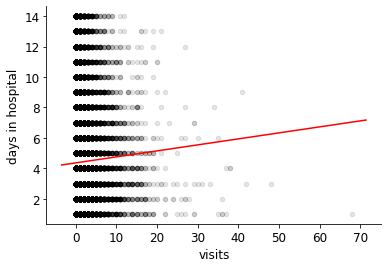

In [94]:
#q9
plt.rcParams['font.size'] = 12
ax = train.plot.scatter(x="visits", y='time_in_hospital', color='k', alpha=0.1)
ax.set_ylabel("days in hospital")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
abline(lr_q9.coef_[0], lr_q9.intercept_[0])
check_regression(ax)

In [95]:
#q10 
train['predy'] = lr_q9.predict(train[['visits']])
test['predy'] = lr_q9.predict(test[['visits']])
train_score = explained_variance_score(train[['time_in_hospital']], train[['predy']])
test_score = explained_variance_score(test[['time_in_hospital']], test[['predy']])
(train_score, test_score)

(0.0009184071670116367, 0.001087944356748527)

# Part 4: Transformer

In [96]:
train[["race", "gender", "age"]].head()

,race,gender,age
0,Caucasian,Female,[0-10)
2,AfricanAmerican,Female,[20-30)
3,Caucasian,Male,[30-40)
5,Caucasian,Male,[50-60)
8,Caucasian,Female,[80-90)


In [97]:
from sklearn.base import TransformerMixin
import re

def range_mid(r):
    r = r.strip("[]()")
    x = int(r.split("-")[0])
    y = int(r.split("-")[1])
    return int((x+y)/2) # TODO: fix the logic here!

class DemographicTransformer(TransformerMixin):
    def fit(self, train_df, y=None):
        race_columns = set(train['race'])
        race_columns.remove("?")
        self.race_columns = sorted(race_columns)
        # TODO: compute self.race_columns to contain every unique
        #  value in the race column of train_df, in sorted order,
        #  excluding "?"

        return self

    def transform(self, df1):
        df2 = pd.DataFrame()

        # TODO: uncomment after fit function is finished
        for race in self.race_columns:
            df2[race] = (df1["race"] == race).astype(int)

        for gender in ["Female", "Male"]:
            df2[gender] = (df1["gender"] == gender).astype(int)

        df2["age"] = df1["age"].apply(range_mid)
        self.output_features_ = list(df2.columns)
        return df2

In [98]:
#q11
DemographicTransformer().fit_transform(train).head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,age
0,0,0,1,0,0,1,0,5
2,1,0,0,0,0,1,0,25
3,0,0,1,0,0,0,1,35
5,0,0,1,0,0,0,1,55
8,0,0,1,0,0,1,0,85


In [99]:
lr = LinearRegression()
pipe = Pipeline([
    ("dem", DemographicTransformer()),
    ("lr", LinearRegression()),
])
y = "time_in_hospital"
pipe.fit(train, train[[y]])

Pipeline(steps=[('dem',
                 <__main__.DemographicTransformer object at 0x7fae3bace6d8>),
                ('lr', LinearRegression())])

In [100]:
print(pipe["dem"].output_features_)
print(pipe["lr"].coef_)
print(pipe["lr"].intercept_)

['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'Female', 'Male', 'age']
[[ 0.31642938 -0.28682291  0.03972782 -0.13599293 -0.09728822  3.41501088
   3.28431964  0.02135683]]
[-0.44633433]


In [101]:
#q12
eq = "stay = "
count = 0
for race in pipe['dem'].output_features_:
    coef = pipe['lr'].coef_[0][count]
    coef = "%.2f" % round(coef, 2)
    rel = f"{coef}*{race} + "
    eq += rel
    count += 1
    
eq +=  str(pipe["lr"].intercept_[0].round(2))
eq

# expected = "stay = 0.32*AfricanAmerican + -0.29*Asian + 0.04*Caucasian + -0.14*Hispanic + -0.10*Other + 3.42*Female + 3.28*Male + 0.02*age + -0.45"
# print(expected)
# print(eq)

'stay = 0.32*AfricanAmerican + -0.29*Asian + 0.04*Caucasian + -0.14*Hispanic + -0.10*Other + 3.42*Female + 3.28*Male + 0.02*age + -0.45'

In [123]:
#q13
train['pred_p'] = pipe.predict(train)
test['pred_p'] = pipe.predict(test)
train_score = explained_variance_score(train[['time_in_hospital']], train[['pred_p']])
test_score = explained_variance_score(test[['time_in_hospital']], test[['pred_p']])
(train_score, test_score)

(0.014362012823362136, 0.012415699517403067)

In [124]:
train["readmit_soon"] = train["readmitted"] == "<30"
test["readmit_soon"] = test["readmitted"] == "<30"

In [125]:
#q14
LR = LogisticRegression(solver="lbfgs")
LR.fit(train[["time_in_hospital"]],train["readmit_soon"])

train_as = accuracy_score(train["readmit_soon"],LR.predict(train[["time_in_hospital"]]))
test_as = accuracy_score(test["readmit_soon"],LR.predict(test[["time_in_hospital"]]))

train_as,test_as

(0.8883333661397949, 0.8884681043109707)

In [126]:
class NaiveEstimator(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        if y.sum() / len(y) > 0.5:
            self.prediction = True
        else:
            self.prediction = False

    def predict(self, X):
        return [self.prediction] * len(X)

In [127]:
#q15
NE = NaiveEstimator()
NE.fit(train[["time_in_hospital"]],train["readmit_soon"])
NE_train_as = accuracy_score(train["readmit_soon"],NE.predict(train[["time_in_hospital"]]))
NE_test_as = accuracy_score(test["readmit_soon"],NE.predict(test[["time_in_hospital"]]))
NE_train_as,NE_test_as

(0.8883333661397949, 0.8884681043109707)

[[45279, 0], [5684, 0]]

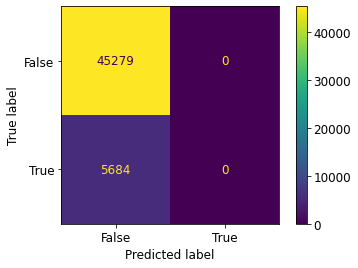

In [128]:
#q16
plot_confusion_matrix(LR,test[["time_in_hospital"]],test["readmit_soon"]).confusion_matrix.tolist()

[[32725, 12554], [3105, 2579]]

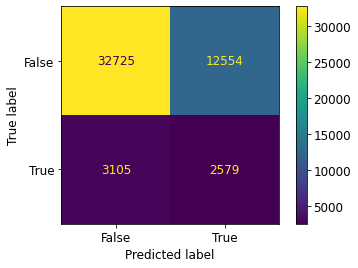

In [133]:
#q17
cols=["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient"]
LR = LogisticRegression(class_weight="balanced")
LR.fit(train[cols],train["readmit_soon"])
plot_confusion_matrix(LR,test[cols],test["readmit_soon"]).confusion_matrix.tolist()

[[43630, 1649], [5363, 321]]

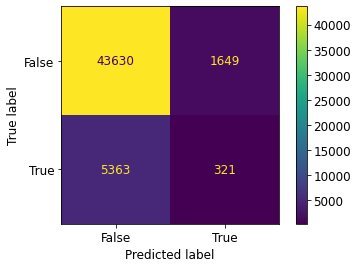

In [134]:
#q18
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(train[cols],train["readmit_soon"])
plot_confusion_matrix(KN,test[cols],test["readmit_soon"]).confusion_matrix.tolist()